# CNN

- NxN data
- filter size = F
    - output size = (N-F) / stride + 1
    
### In practice : Common to zero pad the border
- input 7x7
- filter 3x3
- stride 1
- pad with 1 pixel border
    - input = 9x9

- output = 7x7
    - 즉, zero padding을 통해서 입력 이미지와 출력 이미지의 크기를 같게 유지가능

ex)
32x32x3 image _ 5x5x3 filter1 _ 5x5x3 filter2 _ _ _ _ 5x5x3 filter6
activation maps = ( , , 필터갯수) 앞의 두 값은 전체 이미지와 필터 사이즈에 따라 달라짐
패딩을 안하면 위의 경우 (28,28,6)이 됨

### pooling layer (sampling)
- Max pooling
    - 4x4 Input
    - 2x2 filters
    - stride 2
        - output = 2x2
        - max pooling은 가장 큰 값을 입력하는 방법
        
### Fully connected layer(FC layer)

# CNN example

In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


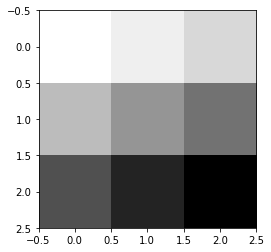

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

In [3]:
image.shape

(1, 3, 3, 1)

In [4]:
# filter
## ( n, n,color,number)
## color = image의 color와 동일

In [5]:
# conv2d(image, weight, strides, padding)

In [6]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


In [7]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 2, 2, 1)


[[12. 16.]
 [24. 28.]]


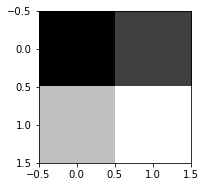

In [8]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

In [9]:
# padding = same 인 경우 input과 output의 크기를 같게 만들겠다라는 의미

In [10]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


In [11]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


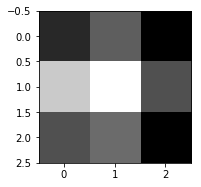

In [12]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3)

In [13]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)


In [14]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 3)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


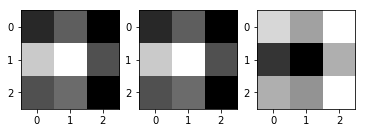

In [15]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## max pooling

In [16]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


In [17]:
# padding = same
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


### Mnist Data example

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\MJ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


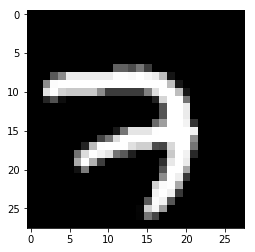

In [19]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

C:\Users\MJ\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


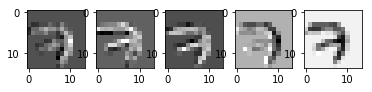

In [20]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
# 28x28x1 (1 color)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# weight는 color을 신경써야함. 3x3 filter, 1 color, 5 filters
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
# stride는 2x2, pading = same이면, stride가 2이기 때문에, input 사이즈는 1/2
print(conv2d)
# conv2d. shape = 1x14x14x5
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

### MNIST max pooling

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


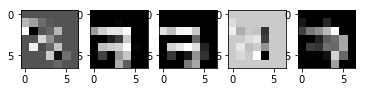

In [21]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
# stride = 2x2, padding = same, stride가 2이기 때문에 pool은 input size / 2
print(pool)
# (1,7,7,5)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

# CNN MNIST exmaple

In [35]:
tf.reset_default_graph()

In [22]:
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(207)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [36]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [37]:
keep_prob = tf.placeholder(tf.float32)

In [38]:
X = tf.placeholder(tf.float32, [None, 28*28])
X_img = tf.reshape(X, [-1, 28,28, 1]) # 28x28x1   28x28 size & 1 color
Y = tf.placeholder(tf.float32, [None, 10]) # labels = 0~9

In [39]:
# fist conv layer
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
# filter = 3x3, 1 color, filter number = 32
# Conv -> (?, 28, 28, 32) # padding=SAME 이기 때문에 28x28 유지, 32개 필터
# Poll -> (?, 14, 14, 32) # stride가 2이고, padding=SAME이기 때문에 28x28 -> 14x14
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

In [40]:
# second conv layer
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
# 3x3 filter, 32는 first conv 에서 오는 32개 필터, 64는 새로운 필터의 개수
# Conv -> (?, 14, 14, 64)
# pool -> (?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
# size = 2x2, stride = 2x2
L2 = tf.reshape(L2, [-1, 7*7*64])

In [41]:
# FC layer
# Final FC 7x7x64 inputs -> 10 outputs(0~9)
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2, W3) + b

In [42]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [43]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [44]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Learning started. It takes sometime.
Epoch: 0001 cost = 0.365848373
Epoch: 0002 cost = 0.112622599
Epoch: 0003 cost = 0.078331181
Epoch: 0004 cost = 0.064425407
Epoch: 0005 cost = 0.053574341
Epoch: 0006 cost = 0.048294075
Epoch: 0007 cost = 0.043377898
Epoch: 0008 cost = 0.037750552
Epoch: 0009 cost = 0.033935846
Epoch: 0010 cost = 0.030276788
Epoch: 0011 cost = 0.027562464
Epoch: 0012 cost = 0.023947605
Epoch: 0013 cost = 0.022409607
Epoch: 0014 cost = 0.020103913
Epoch: 0015 cost = 0.017979104
Learning Finished!
Accuracy: 0.9835


In [1]:
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(207)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\MJ\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [3]:
keep_prob = tf.placeholder(tf.float32)

In [4]:
X = tf.placeholder(tf.float32, [None, 28*28])
X_img = tf.reshape(X, [-1,28,28,1]) # img 28x28x1 (1 color)
Y = tf.placeholder(tf.float32, [None, 10]) # labels = 0~9

In [6]:
# layer 1
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
# Conv -> [?,28,28,32]
# Pool -> [?,14,14,32]
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

In [8]:
# layer 2
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
# Conv -> [? , 14,14, 64]
# pool -> [?, 7, 7, 64]
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [10]:
# layer 3
W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
# Conv = [?, 7, 7, 128]
# Pool = [?, 4, 4, 128]
# reshape = [?, 4*4*128] # flatten for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding="SAME")
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 4*4*128])

In [11]:
# layer4 = FC
# FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128*4*4, 625],
                    initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4)+ b4)
Lt = tf.nn.dropout(L4, keep_prob=keep_prob)

In [12]:
# layer5 = FC
# 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5)+b5

In [13]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
print("Deep learning start. It takes sometime.")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys, keep_prob:0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print("Epoch:", "%04d" % (epoch + 1), 'cost:', '{:.9f}'.format(avg_cost))
    
print('Deep learning End')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

Deep learning start. It takes sometime.
Epoch: 0001 cost: 0.019095502
Epoch: 0002 cost: 0.018910083
Epoch: 0003 cost: 0.017512476
Epoch: 0004 cost: 0.019057623
Epoch: 0005 cost: 0.016228629
Epoch: 0006 cost: 0.017249899
Epoch: 0007 cost: 0.014868043
Epoch: 0008 cost: 0.016490480
Epoch: 0009 cost: 0.015332666
Epoch: 0010 cost: 0.015066526
Epoch: 0011 cost: 0.014114765
Epoch: 0012 cost: 0.013655855
Epoch: 0013 cost: 0.012106912
Epoch: 0014 cost: 0.014994144
Epoch: 0015 cost: 0.013299803
Deep learning End


AttributeError: 'DataSet' object has no attribute 'image'

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))

Accuracy: 0.9935


# CNN using CLASS

In [12]:
tf.reset_default_graph()

In [13]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
class Model:
    
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (=keep_prob) rate : 0.5~07 on training, should be 1 for testing
            self.keep_prob = tf.placeholder(tf.float32)
            
            # input
            self.X = tf.placeholder(tf.float32, [None, 28*28])
            X_img = tf.reshape(self.X, [-1, 28,28,1])
            self.Y = tf.placeholder(tf.float32, [None, 10])
            
            # layer 1
            W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
            L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)
            
            # layer 2
            W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
            L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding="SAME")
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)
            
            # layer 3
            W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
            L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding="SAME")
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)
            
            L3_flat = tf.reshape(L3, [-1, 4*4*128])
            
            # layer 4 = FC
            ## final layer / input = 4*4*128 _ output = 625
            W4 = tf.get_variable("W4", shape=[128*4*4, 625],
                                initializer = tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4)+b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)
            
            # layer 5 = FC
            ## final layer / input = 625 _ output = 10
            W5 = tf.get_variable("W5", shape=[625, 10],
                                initializer = tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5)+b5
            
            # cost / optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)
            
        correct_prediction = tf.equal(tf.argmax(self.logits,1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            
    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, 
                                                         self.keep_prob:keep_prop})
        
    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test,
                                                          self.Y: y_test,
                                                          self.keep_prob:keep_prop})
        
    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
                self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})

In [14]:
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.keep_prob = tf.placeholder(tf.float32)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            # img 28x28x1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # L1 ImgIn shape=(?, 28, 28, 1)
            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)
            '''
            Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
            Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
            '''

            # L2 ImgIn shape=(?, 14, 14, 32)
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)
            '''
            Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
            Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
            '''

            # L3 ImgIn shape=(?, 7, 7, 64)
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            #    Conv      ->(?, 7, 7, 128)
            #    Pool      ->(?, 4, 4, 128)
            #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
            '''
            Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
            '''

            # L4 FC 4x4x128 inputs -> 625 outputs
            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)
            '''
            Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
            Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
            '''

            # L5 Final FC 625 inputs -> 10 outputs
            W5 = tf.get_variable("W5", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5
            '''
            Tensor("add_1:0", shape=(?, 10), dtype=float32)
            '''

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})

In [15]:
sess = tf.Session()

In [16]:
m1 = Model(sess, "m1")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
sess.run(tf.global_variables_initializer())

In [18]:
print("Deeplearning Start")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch
        
    print("Epoch:", "%04d" % (epoch + 1), 'cost:', '{:.9f}'.format(avg_cost))
    
print('Deep learning End')

print("Accuracy:", m1.get_accuracy(mnist.test.images, mnist.test.labels))

Deeplearning Start
Epoch: 0001 cost: 0.418834060
Epoch: 0002 cost: 0.092228168
Epoch: 0003 cost: 0.068900539
Epoch: 0004 cost: 0.058053490
Epoch: 0005 cost: 0.049416524
Epoch: 0006 cost: 0.044746012
Epoch: 0007 cost: 0.041444015
Epoch: 0008 cost: 0.039242452
Epoch: 0009 cost: 0.034758848
Epoch: 0010 cost: 0.033500357
Epoch: 0011 cost: 0.029538118


KeyboardInterrupt: 